In [1]:
from keras.models import load_model
import numpy as np
import os
from tqdm import tqdm
import pickle
import cv2
import random
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMG_SIZE = 200
CATEGORIES = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]
MODEL_SAVE_PATH = ''

In [3]:
def create_testing_data(test_dirs):
    testing_data = []
    for test_dir in test_dirs:
        for category in CATEGORIES:
            path = os.path.join(test_dir, category)
            class_num = CATEGORIES.index(category)
            for img in tqdm(os.listdir(path)):
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                testing_data.append([new_array, class_num])
    random.shuffle(testing_data)
    return testing_data

In [4]:
def evaluate_and_plot(model, test_dirs, labels):
    accuracies = []
    for test_dir, label in zip(test_dirs, labels):
        testing_data = create_testing_data([test_dir])
        X_test = np.array([i[0] for i in testing_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
        Y_test = np.array([i[1] for i in testing_data])
        X_test = X_test / 255.0

        # Predict and evaluate
        scores = model.evaluate([X_test, X_test], Y_test, verbose=1)
        accuracies.append(scores[1])
        print(f'Test loss on {test_dir}:', scores[0])
        print(f'Test accuracy on {test_dir}:', scores[1])

        # Generate predictions and compute confusion matrix
        Y_pred = model.predict([X_test, X_test])
        Y_pred_classes = np.argmax(Y_pred, axis=1)
        cm = confusion_matrix(Y_test, Y_pred_classes)

        # Display confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CATEGORIES)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {label}')
        plt.show()

    # Plot accuracies
    plt.figure(figsize=(10, 5))
    plt.bar(labels, accuracies, color='skyblue')
    plt.xlabel('Dataset')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy on Different Datasets')
    plt.show()


In [5]:
model = load_model(MODEL_SAVE_PATH)

100%|██████████| 74/74 [00:48<00:00,  1.51it/s]


13/13 ━━━━━━━━━━━━━━━━━━━━ 32s 895ms/step - accuracy: 0.8252 - loss: 0.6318
Test loss on /content/drive/My Drive/FVAB/TestingSartaJNoGaussiano: 0.653502345085144
Test accuracy on /content/drive/My Drive/FVAB/TestingSartaJNoGaussiano: 0.817258894443512
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 457ms/step


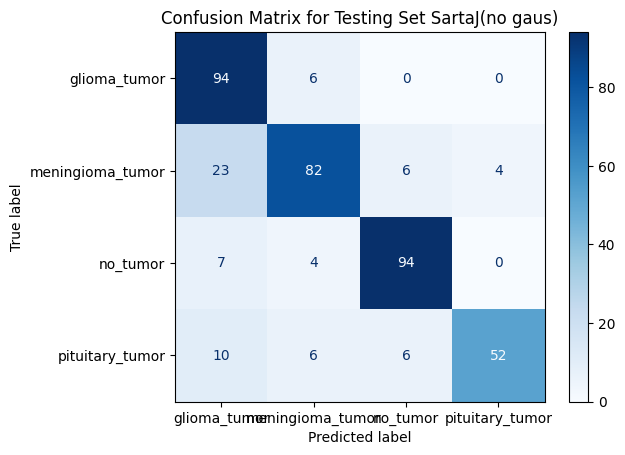

100%|██████████| 233/233 [00:05<00:00, 42.41it/s] 


29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 416ms/step - accuracy: 0.8912 - loss: 0.3574
Test loss on /content/drive/My Drive/FVAB/Testing2NoGaussiano: 0.3278438448905945
Test accuracy on /content/drive/My Drive/FVAB/Testing2NoGaussiano: 0.8936877250671387
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step


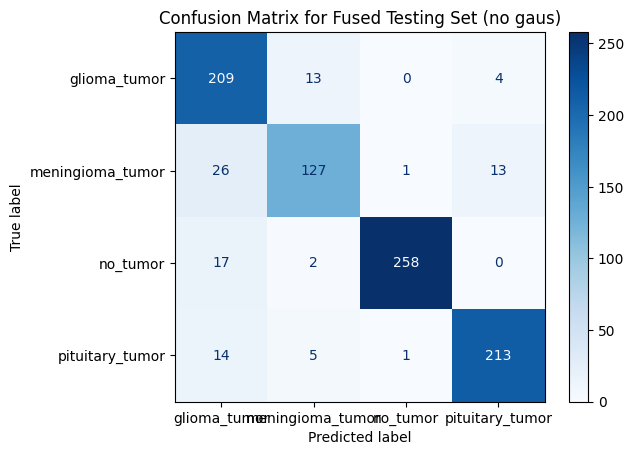

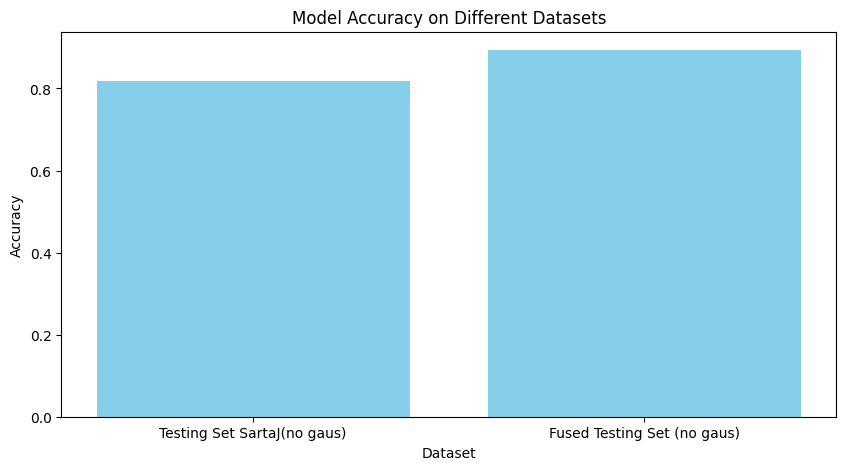

In [ ]:
# Define the test directories and labels
test_dirs = [
    '',
    ''

]
labels = ['Testing Set SartaJ(no gaus)', 'Fused Testing Set (no gaus)']

# Evaluate the model and plot the results
evaluate_and_plot(model, test_dirs, labels)